In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ans 2 A

In [193]:
def normalEquationRidgeRegression(X, y,alpha):
    ide = np.identity(len(X[0])+1,dtype = float) 
    X = np.c_[np.ones(len(X)),X] 
    ide = alpha*ide
    mul  = np.dot(X.T,X)
    sum1 = mul + ide
    inv = np.linalg.inv(sum1)
    z = np.dot(X.T,y)
    coef = np.dot(inv,z)
    return coef
X = X_train.values
y = y_train.values
alpha = .1
theta = normalEquationRidgeRegression(X, y,alpha)
print(theta)

[-4.18936103e-01 -6.44177526e-03  2.44413803e+00 -2.59689725e-01
 -5.85445383e-03  1.18147544e+00  4.96777330e+01 -5.03144285e+01]


# 2 b

[-0.65836938  1.52026712 -3.02917686 -5.85599241  3.18855211  2.81778333
 -0.45047249 38.39154079]


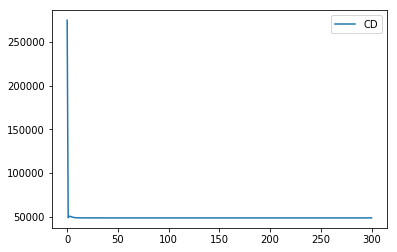

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
X = X_train.values
y = y_train.values.reshape(-1,1)
X = StandardScaler().fit_transform(X)  
X = np.hstack([X, np.ones((X.shape[0], 1))])

param = np.zeros(X.shape[1])
def coordinate_descent_regression(X, y, param, iter=300):
    cost_history = [0] * (iter+1)
    cost_history[0] = costf(X, y, param)

    for iteration in range(iter):
        for i in range(len(param)):
            dele = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            param[i] = np.dot(X[:,i].T, (y.ravel() - dele))/np.sum(np.square(X[:,i]))
            cost = costf(X, y, param)
            cost_history[iteration+1] = cost

    return param, cost_history

cret, cxret = coordinate_descent_regression(X, y, param.copy())
print(cret)
plt.plot(range(len(cxret)), cxret, label="CD")
plt.legend()

# ANS 2 c

In [57]:
def soft_threshold(rho,lamda):
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda,num_iters=100,intercept = False):
     
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) 
    for i in range(num_iters): 
        for j in range(n):
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [97]:
X1 = X_train.values 
y1 = y_train.values
y1 = y1.reshape(-1,1)
print(X1.shape)
print(y1.shape)

(331, 7)
(331, 1)


In [92]:
initial_theta = np.ones((7,1))
l = .1
theta = coordinate_descent_lasso(initial_theta,X1,y1,lamda=.1,num_iters=100)
print(theta)

[ -28.81331726  718.29205517  -95.30827622 -162.19186311  114.345998
   98.43870126    0.        ]


# ANS 2 D

In [164]:
alpha = 0.01 #Step size
iterations = 50 #No. of iterations
m = 331#y1.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(8) #Pick some random values to start with


data1 = pd.read_csv('realstate.csv')
x = X_train.values#data1[['X1 transaction date','X3 distance to the nearest MRT station']]
y = y_train.values#data1['Y house price of unit area']

#GRADIENT DESCENT

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    opt_cost = 9999999999999999999
    opt_theta = theta
    for i in range(iterations):
        prediction = np.dot(x, theta)
        
        p1 = prediction #.reshape(-1,1)
        error = p1 - y
        #print(error.shape)
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        xy = np.dot(x.T, error)
        #print(xy.shape)
        theta = theta - (alpha * (1/m) * np.dot(x.T,error))
        past_thetas.append(theta)
        if(opt_cost>cost):
            opt_cost = cost
            opt_theta = theta
        
    return [opt_cost,opt_theta]
#X = np.array([[1, 2], [2, 4], [3, 6],[4,8]])
#print(X)
y1 = np.array([2,3,4,5]).T
print(y1)
print(type(y))
print(type(X))
y = y.T
print(y)
#print(y.shape)
x = np.c_[np.ones(len(x)),x]
#Pass the relevant variables to the function and get the new values back...
theta = gradient_descent(x, y, theta, iterations, alpha)
print("Gradient Descent: ",(theta[0], theta[1]))
acc = Accuracy(X_test,y_test,theta[1])

[2 3 4 5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 42.7  23.9  32.1  38.3  40.8  30.8  34.6  29.3  35.5  34.1  54.8  42.3
  30.   21.3  38.6  28.1  55.   24.4  28.5   7.6  22.3  62.1  50.   31.3
  25.7  37.5  39.   34.1  32.9  49.3  57.1  24.7  55.3  55.   53.3  23.1
  29.5  40.1  45.1  70.1  50.7  37.   46.7  29.3  47.7  19.2  20.9  29.4
  39.1  45.5  38.1  28.4  31.5  36.6  31.9  29.7  17.7  37.4  42.5  54.4
  40.3  59.6  40.9  40.2  40.9  42.   25.6  51.7  22.9  42.5  36.3  58.1
  43.5  39.6  42.4  39.4  34.4  38.1  40.3  46.1  55.3  39.4  48.5  41.4
  15.6  45.7  36.8  44.   63.3  43.4  27.3  42.3  19.   55.9  40.2  25.3
  67.7  55.5  43.2  40.6  21.8  42.   45.5  59.5  40.1  40.   34.6  15.
  36.2  47.9  25.3  28.4  32.5  46.6  23.6  56.8  42.9  21.7  24.7  12.9
  19.2  52.2  48.6  52.2  44.5  27.   52.5  78.3  47.   36.7  45.3  41.6
  18.8  43.8  38.1  38.4  35.3  41.   47.7  58.1  45.4  21.5  44.8  23.1
  42.6  35.7  24.8  30.9  13.   47.3  32.9  23.   16.7  32.4  23.8 

# ANS 2E

In [233]:
def gradientDescentAutogradLasso(X,y,lemda,alpha=0.1):
    print(type(X))
    print(type(y))
    k = X.shape[1]
    theta_ = np.zeros(k)
    learn_c = alpha
    Yhat = np.dot(X,theta_)
    delta = Yhat - y
    theta_ = theta_ - learn_c*(np.dot(X.T,delta) + lemda*np.sign(theta_)) /100
    return theta_

In [234]:
import autograd.numpy as np 
from autograd import grad   
from autograd import jacobian
from autograd import elementwise_grad as egrad

autograd=egrad(gradientDescentAutogradLasso)

In [242]:
X = X_train.values
y = y_train.values
theta=autograd(X,y,0.00000001)
print("optimal theta:",theta[-1])

<class 'autograd.numpy.numpy_boxes.ArrayBox'>
<class 'numpy.ndarray'>
optimal theta: [0.0544 0.0544 0.0544 0.0544 0.0544 0.0544 0.0544]


# Ans 4 A

In [179]:
from sklearn.linear_model import Ridge as R
x = np.array([[1,2],[2,4],[3,6],[4,8]])
y = np.array([2,3,4,5])
model = R(alpha = 1)
model.fit(x,y)
model.coef_

array([0.19230769, 0.38461538])

# B

In [176]:
X = np.array([[1, 2], [2, 4], [3, 6],[4,8]])
y = np.array([[2,3,4,5]]).T

In [177]:
#(XTX+λI)−1XTY
def rfit(X, y,alpha):
    ide = np.identity(2,dtype = float) 
    ide = alpha*ide
    mul  = np.dot(X.T,X)
    sum1 = mul + ide
    print(sum1)
    inv = np.linalg.inv(sum1)
    z = np.dot(X.T,y)
    coef = np.dot(inv,z)
    return coef
        

In [178]:
x = rfit(X, y,1)
print(x)

[[ 31.  60.]
 [ 60. 121.]]
[[0.26490066]
 [0.52980132]]


# ANS 5

In [126]:
data = pd.read_csv('realstate.csv')

In [136]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [155]:
X = data.drop(['Y house price of unit area'],axis = 1)

In [156]:
Y = data['Y house price of unit area']

In [143]:
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(data[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']])

/home/karan/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/karan/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [158]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [160]:
print(X_train.shape)

(331, 7)


In [161]:
X1,X2,X3,X4,X5 = X_train[0:66],X_train[66:130],X_train[130:195],X_train[195:260],X_train[260:331]

In [162]:
y1,y2,y3,y4,y5 = y_train[0:66],y_train[66:130],y_train[130:195],y_train[195:260],y_train[260:331]

In [163]:
z1 = [X1,X2,X3,X4,X5]

In [164]:
z2 = [y1,y2,y3,y4,y5]

In [165]:
z2[0].head()

192    42.7
234    23.9
5      32.1
45     38.3
245    40.8
Name: Y house price of unit area, dtype: float64

# ANS 5 A

In [166]:
from sklearn.linear_model import Ridge
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
opt_coef = [0,0,0,0,0,0,0]
for i in range(0,5):
    X = pd.concat([z1[(i+1)%5],z1[(i+2)%5],z1[(i+3)%5],z1[(i+4)%5]])
    y = pd.concat([z2[(i+1)%5],z2[(i+2)%5],z2[(i+3)%5],z2[(i+4)%5]])
    test_x = z1[i]
    test_y = z2[i]
    clf = Ridge(alpha=1.0)
    clf.fit(X, y)
    predict = clf.predict(test_x)
    score = mse(test_y,predict)
    if(opt_score>math.sqrt(score)):
        opt_score = math.sqrt(score)
        opt_coef = clf.coef_
print(opt_score)
print(opt_coef)

7.6877608175541825
[-4.29133696e-03  5.73589922e+00 -2.64240002e-01 -5.55925301e-03
  1.30213971e+00  6.46956262e+00 -1.20113846e+00]


In [167]:
from sklearn.linear_model import Ridge
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
alpha_val = [.1,.5,1,1.5,5,10,15,20,25]
opt_alpha = 0
k = 1
for j in alpha_val:
    score1 = []
    for i in range(0,5):
        X = pd.concat([z1[(i+1)%5],z1[(i+2)%5],z1[(i+3)%5],z1[(i+4)%5]])
        y = pd.concat([z2[(i+1)%5],z2[(i+2)%5],z2[(i+3)%5],z2[(i+4)%5]])
        test_x = z1[i]
        test_y = z2[i]
        clf = Ridge(alpha=j)
        clf.fit(X, y)
        predict = clf.predict(test_x)
        score = mse(test_y,predict)
        score1.append(math.sqrt(score))
    print("in ",k," fold the RMSE in cross validation is",sum(score1)/len(score1))
    if(opt_score>(sum(score1)/len(score1))):
        opt_score = sum(score1)/len(score1)
        opt_alpha = j
    k = k+1
print("Optimal score of the in cross validation is: ",opt_score," at alpha:  ",opt_alpha)
print(opt_coef)

in  1  fold the RMSE in cross validation is 9.281082096439569
in  2  fold the RMSE in cross validation is 9.35966146389692
in  3  fold the RMSE in cross validation is 9.373412225558798
in  4  fold the RMSE in cross validation is 9.378441956198628
in  5  fold the RMSE in cross validation is 9.389495657788633
in  6  fold the RMSE in cross validation is 9.400280593749969
in  7  fold the RMSE in cross validation is 9.410628171655345
in  8  fold the RMSE in cross validation is 9.42006710629711
in  9  fold the RMSE in cross validation is 9.428457100418385
Optimal score of the in cross validation is:  9.281082096439569  at alpha:   0.1
[-4.29133696e-03  5.73589922e+00 -2.64240002e-01 -5.55925301e-03
  1.30213971e+00  6.46956262e+00 -1.20113846e+00]


In [168]:
clf = Ridge(alpha=opt_alpha)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict1 = clf.predict(X_train)
score = mse(y_test,predict)
score1 = mse(y_train,predict1)
print("Test RMSE :",math.sqrt(score))
print("Train RMSE :",math.sqrt(score1))
print("Optimal penalty co-efficient:",clf.coef_)

Test RMSE : 7.501492610745068
Train RMSE : 9.25598502333332
Optimal penalty co-efficient: [-6.26984048e-03  5.62664085e+00 -2.58711874e-01 -5.47568545e-03
  1.18137438e+00  5.74903840e+01 -1.07212006e+01]


# B

In [25]:
from sklearn.linear_model import Lasso
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
alpha_val = [.1,.5,1,1.5,5,10,15,20,25]
opt_alpha = 0
k = 1
for j in alpha_val:
    score1 = []
    for i in range(0,5):
        X = pd.concat([z1[(i+1)%5],z1[(i+2)%5],z1[(i+3)%5],z1[(i+4)%5]])
        y = pd.concat([z2[(i+1)%5],z2[(i+2)%5],z2[(i+3)%5],z2[(i+4)%5]])
        test_x = z1[i]
        test_y = z2[i]
        clf = Lasso(alpha=j)
        clf.fit(X, y)
        predict = clf.predict(test_x)
        score = mse(test_y,predict)
        score1.append(math.sqrt(score))
    print("in ",k," fold the RMSE in cross validation is",sum(score1)/len(score1))
    if(opt_score>(sum(score1)/len(score1))):
        opt_score = sum(score1)/len(score1)
        opt_alpha = j
    k = k+1
print("Optimal score of the in cross validation is: ",opt_score," at alpha:  ",opt_alpha)
print(opt_coef)

in  1  fold the RMSE in cross validation is 9.398685872619689
in  2  fold the RMSE in cross validation is 9.534791039084574
in  3  fold the RMSE in cross validation is 9.548338297238363
in  4  fold the RMSE in cross validation is 9.566377476661659
in  5  fold the RMSE in cross validation is 9.841065844462427
in  6  fold the RMSE in cross validation is 9.997313896004085
in  7  fold the RMSE in cross validation is 10.041267769754635
in  8  fold the RMSE in cross validation is 10.104867658409352
in  9  fold the RMSE in cross validation is 10.187809544377695
Optimal score of the in cross validation is:  9.398685872619689  at alpha:   0.1
[-4.29133696e-03  5.73589922e+00 -2.64240002e-01 -5.55925301e-03
  1.30213971e+00  6.46956262e+00 -1.20113846e+00]


In [26]:
clf = Lasso(alpha=opt_alpha)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict1 = clf.predict(X_train)
score = mse(y_test,predict)
score1 = mse(y_train,predict1)
print("Test RMSE in LASSO:",math.sqrt(score))
print("Train RMSE in LASSO:",math.sqrt(score1))
print("Optimal penalty co-efficient in LASSO:",clf.coef_)

Test RMSE in LASSO: 7.619498424867508
Train RMSE in LASSO: 9.392884751352309
Optimal penalty co-efficient in LASSO: [-0.00655209  4.45742352 -0.2542255  -0.00566117  1.20180036  0.
 -0.        ]


Automatically created module for IPython interactive environment
<class 'numpy.ndarray'>
Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


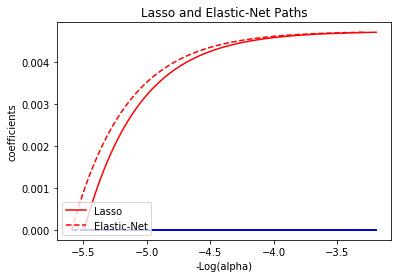

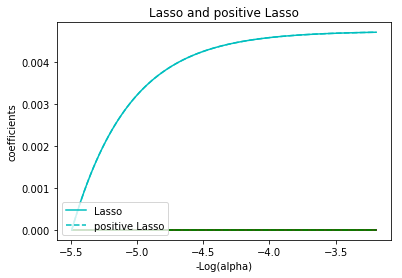

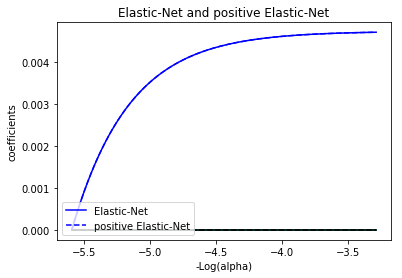

In [163]:
print(__doc__)

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path
from sklearn.linear_model import enet_path
from sklearn import datasets
X = X_train.values#diabetes.data
y = y_train.values#diabetes.target
print(type(X))

X /= X.std(axis=0) 
eps = 5e-3  

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

# ANS 5 C

In [169]:
def soft_threshold(rho,lamda):
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

No handles with labels found to put in legend.


(0.06309573444801936,
 1584.8931924611109,
 -206.21605902147093,
 762.3162510787653)

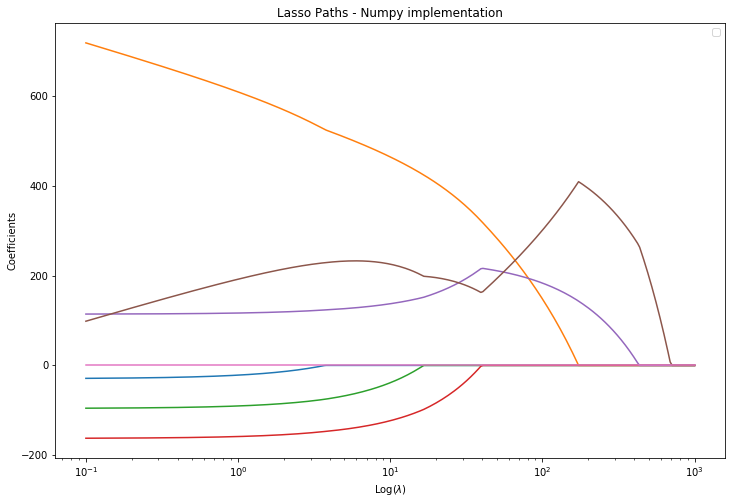

In [170]:
X = X_train.values
y = y_train.values.reshape(-1,1)
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12))

for i in range(n):
    plt.plot(lamda, theta_lasso[i])#, label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

No handles with labels found to put in legend.


(2.355241262996803,
 126814.34901264698,
 -0.24779684133116603,
 0.5479151689837294)

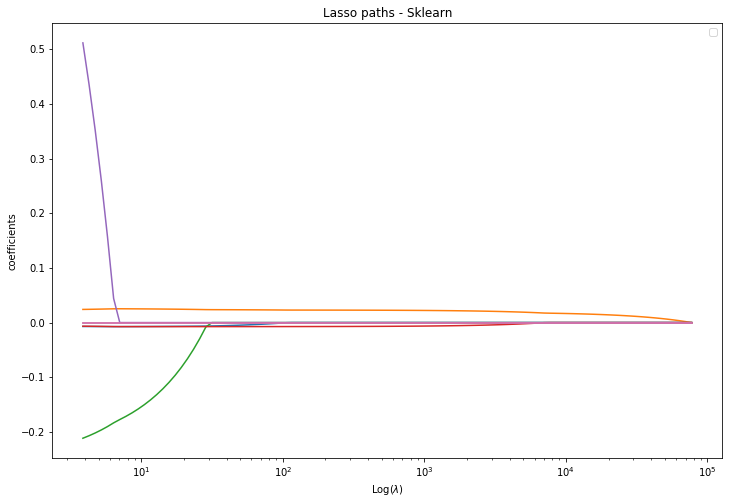

In [171]:
X = X_train.values
y = y_train.values

X / np.linalg.norm(X,axis=0)
m,n = X.shape

eps = 5e-5  

alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

plt.figure(figsize = (12,8))


for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

Automatically created module for IPython interactive environment


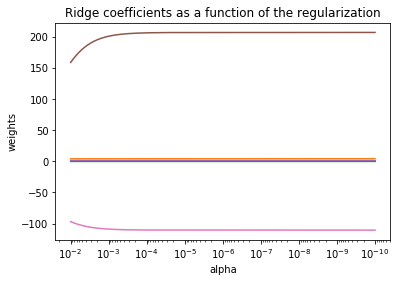

In [75]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
X = X_train.values
y = y_train.values

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# ANS 5 D

In [172]:
from sklearn.linear_model import Ridge
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
lambda1 = [.1]
for k in range(2,50,2):
    lambda1.append(k)
score1 = []
score2 = []
for j in lambda1:
        clf = Ridge(alpha=j)
        clf.fit(X_train, y_train)
        predict1 = clf.predict(X_test)
        predict2 = clf.predict(X_train)
        cv_score = mse(y_test,predict1)
        train_score = mse(y_train,predict2)
        score1.append(math.sqrt(cv_score))
        score2.append(math.sqrt(train_score))

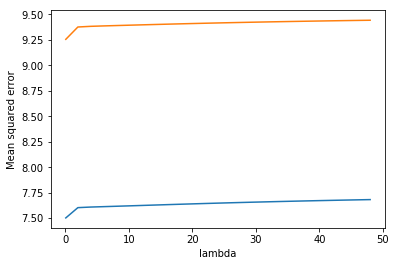

In [173]:
import matplotlib.pyplot as plt
plt.plot(lambda1,score1)
plt.plot(lambda1,score2)
plt.xlabel("lambda")
plt.ylabel("Mean squared error")
plt.show()

In [174]:
from sklearn.linear_model import Lasso
import math
from sklearn.metrics import mean_squared_error as mse
opt_score = 99999999999999999999
lambda1 = [.1]
for k in range(2,50,2):
    lambda1.append(k)
score1 = []
score2 = []
for j in lambda1:
        clf = Lasso(alpha=j)
        clf.fit(X_train, y_train)
        predict1 = clf.predict(X_test)
        predict2 = clf.predict(X_train)
        cv_score = mse(y_test,predict1)
        train_score = mse(y_train,predict2)
        score1.append(math.sqrt(cv_score))
        score2.append(math.sqrt(train_score))

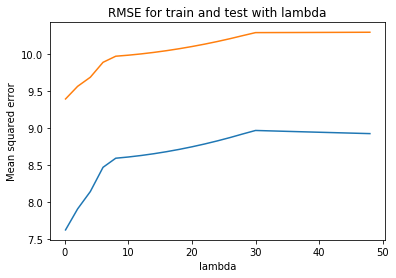

In [175]:
import matplotlib.pyplot as plt
plt.plot(lambda1,score1,label = "xyz")
plt.plot(lambda1,score2,label = "pqr")
plt.xlabel("lambda")
plt.ylabel("Mean squared error")
plt.title("RMSE for train and test with lambda")
plt.show()

# ANS 3 A

In [180]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML, Image
%matplotlib inline
plt.style.use('seaborn-white')

In [210]:
def gradientDescentRegression(x,y,alpha=0.1):
    costs = []
    thetas = []
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
    theta = np.random.rand(x.shape[1])
    theta = np.array(theta)
    init_theta = theta
    iterations = 2000
    m = y.size
    e1 = 0
    e2 = 0
    flag = 0
    #print('theta : ',theta)
    for i in range(iterations):
        prediction = np.dot(x, theta)#.reshape(x.shape[0],1)
        error = prediction - y
        cost = 1/(2*m)* np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        
        e1 = e2
        e2 = cost
        if (e2 - e1) > 0 and flag ==0:
            alpha = alpha - alpha * 0.5
        elif flag==0:
            theta = init_theta
            flag=1
        thetas.append(theta)
    return thetas,costs

In [202]:
data = np.array([[1,3,6],[6,10,16]]).T
#print(data)
X_6b = data[:,:1]
Y_6b = data[:,1:2]
Y_6b = np.array([6,10,16])
print(X_6b,Y_6b.shape)

[[1]
 [3]
 [6]] (3,)


In [203]:
thetas,cost = gradientDescentRegression(X_6b,Y_6b)
print(thetas[-1])

[4. 2.]


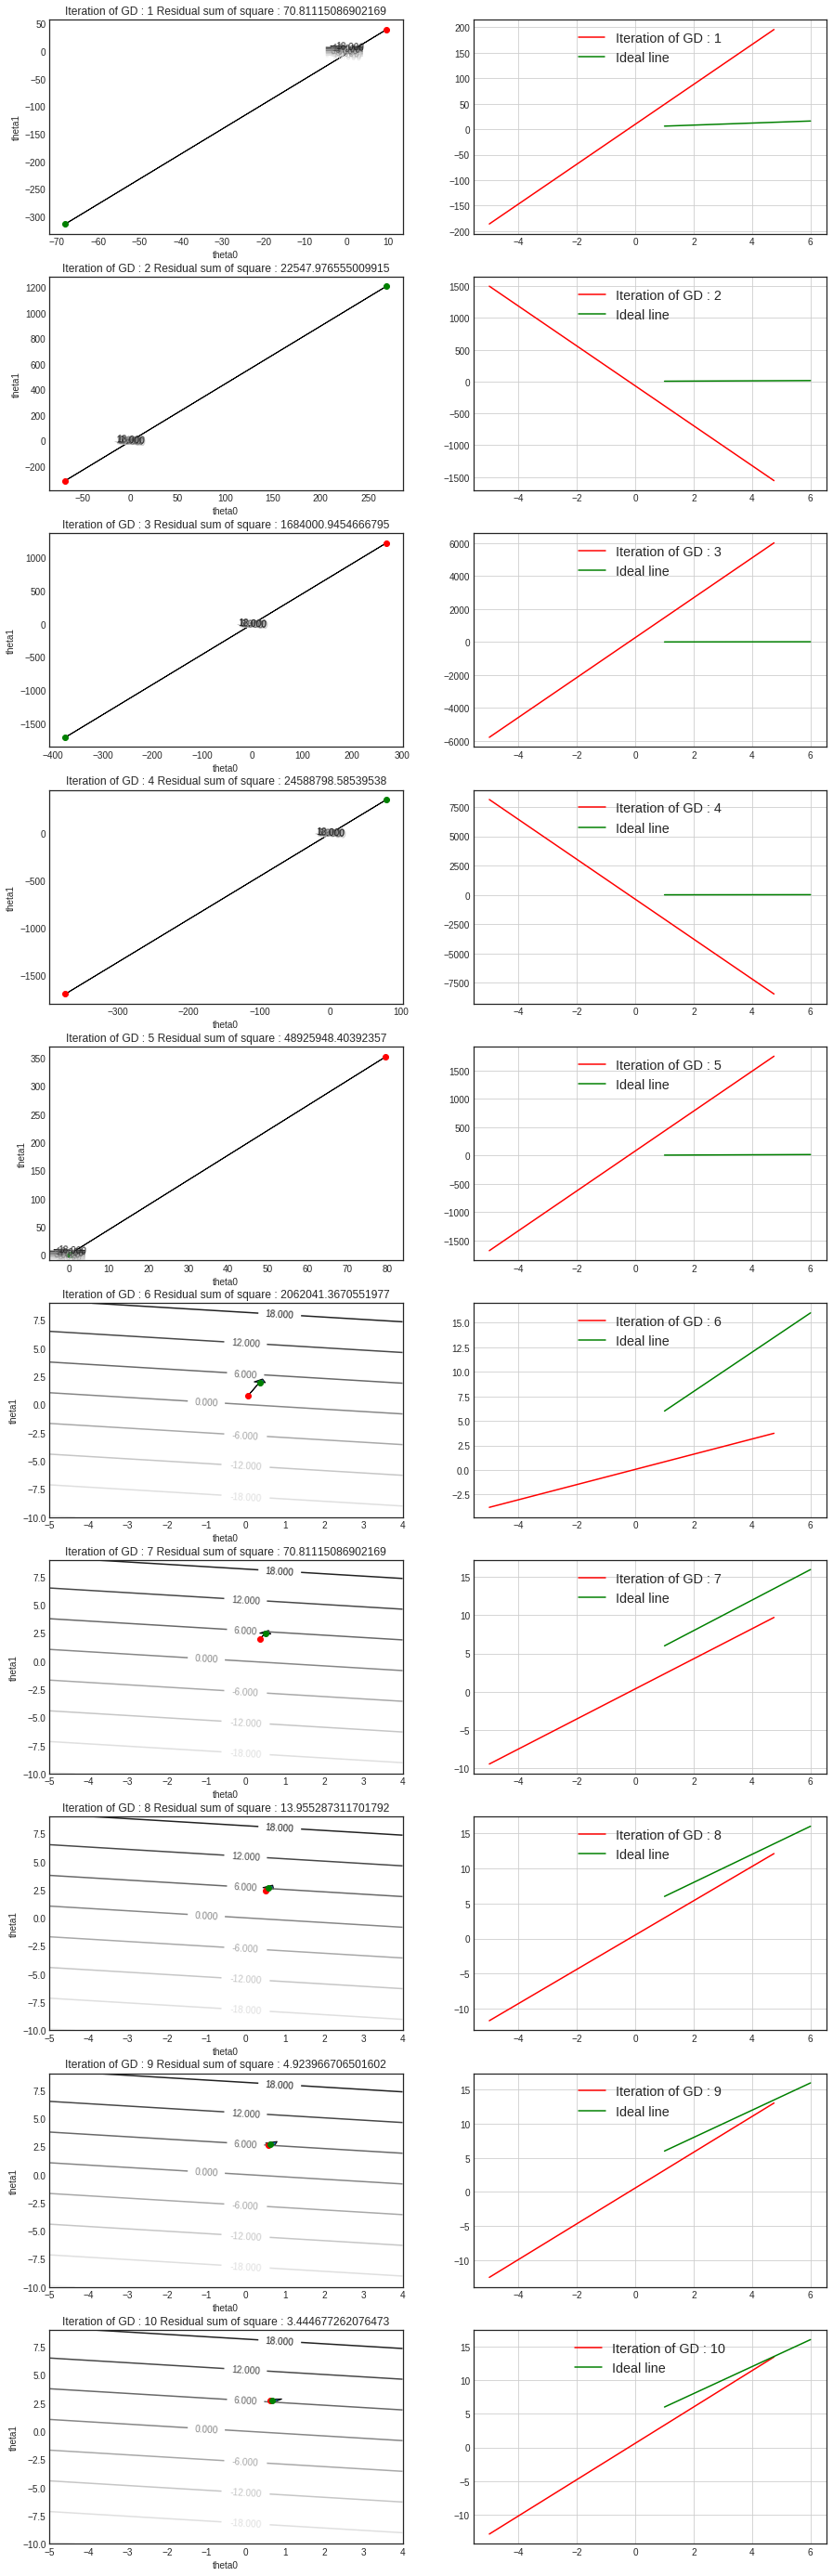

In [241]:
theta1, theta2= .46, 2.2
x = np.arange(-5.0, 5.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = theta1*X + Y*theta2
howManyPlot = 10
indx = np.arange(0,len(thetas),len(thetas)/howManyPlot)
indx.tolist()

x_line = np.arange(-5, 5, 0.25)
x_ideal = []
base_no = 2*howManyPlot*10
f = plt.figure(figsize=(15,50))
#print(base_no)

for i in range(len(indx)):
    ax = f.add_subplot(howManyPlot , 2 , 2*i+1)
    #ax = plt.subplot(howManyPlot , 2 , 2*i+1)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Iteration of GD : '+str(i+1)+' Residual sum of square : '+str(cost[i]))
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.plot(thetas[i][0],thetas[i][1],'ro')
    ax.plot(thetas[i+1][0],thetas[i+1][1],'go')
    ax.arrow(thetas[i][0],thetas[i][1],thetas[i+1][0] - thetas[i][0],thetas[i+1][1] - thetas[i][1] , width = 0.002, head_width = 0.3,head_length = 0.3)
    
    y_line = thetas[i][0] + thetas[i][1]*x_line
    ax_line = f.add_subplot(howManyPlot , 2 , 2*i+2)
    ln = ax_line.plot(x_line,y_line,'r-',label='Iteration of GD : '+str(i+1))
    ax_line.plot(X_6b,Y_6b,'g-',label='Ideal line')
    legend = ax_line.legend(loc='upper center', shadow=True, fontsize='x-large')
    ax_line.grid()

# ANS 3 B

In [220]:
def coordinateDescentRegression(x,y,alpha=0.1):
    costs = []
    thetas = []
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
    theta = np.random.rand(x.shape[1])
    theta = np.array(theta)
    init_theta = theta
    iterations = 2000
    m = y.size
    e1 = 0
    e2 = 0
    flag = 0
    #print('theta : ',theta)
    for i in range(iterations):
        prediction = np.dot(x, theta)#.reshape(x.shape[0],1)
        error = prediction - y
        cost = 1/(m)* np.dot(error.T, error)
        costs.append(cost)
        theta = theta - (alpha*4*np.dot(x.T, error))
        
        e1 = e2
        e2 = cost
        if (e2 - e1) > 0 and flag ==0:
            alpha = alpha - alpha * 0.5
        elif flag==0:
            theta = init_theta
            flag=1
        thetas.append(theta)
    return thetas,costs

In [221]:
thetas,cost = coordinateDescentRegression(X_6b,Y_6b)
print(thetas[-1])

[3.99999999 2.        ]


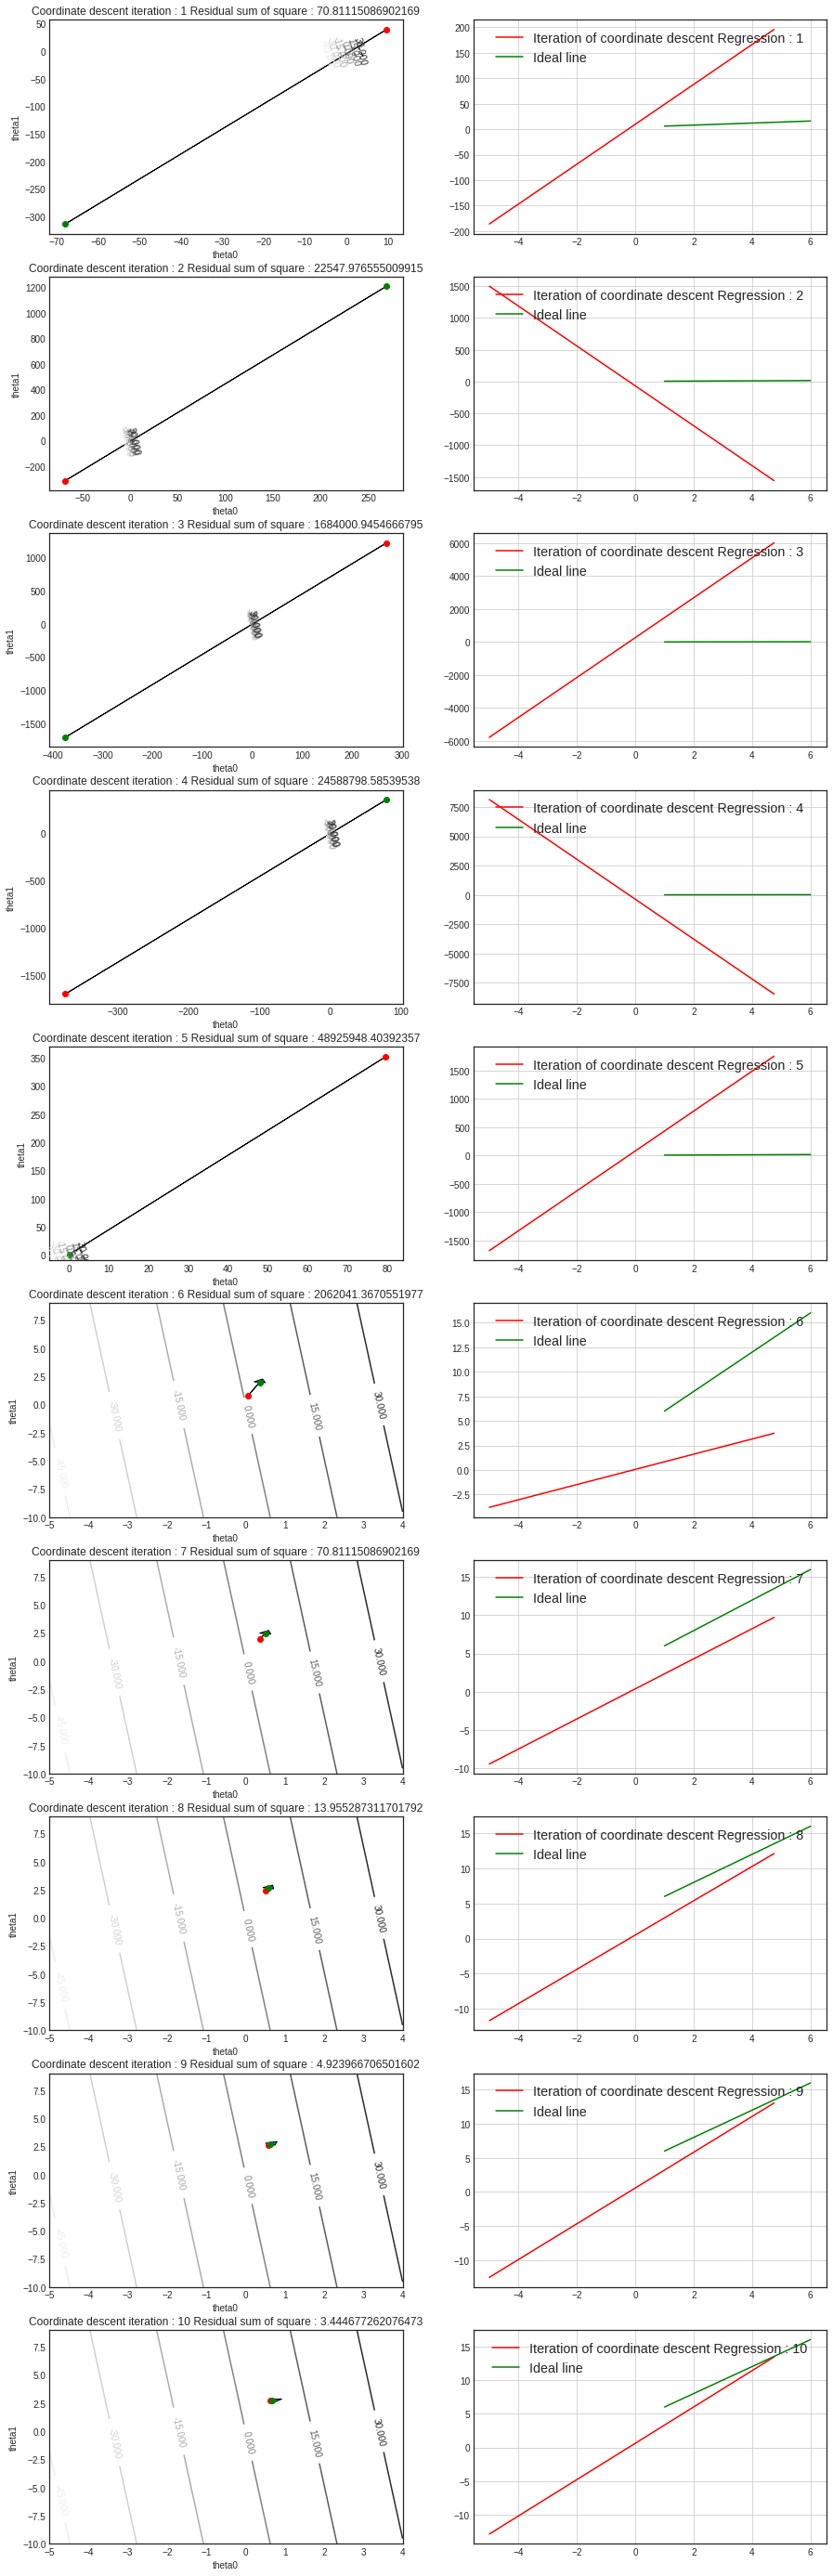

In [240]:
theta1, theta2= 8.82, 0.554
x = np.arange(-5.0, 5.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = theta1*X + Y*theta2
howManyPlot = 10
indx = np.arange(0,len(thetas),len(thetas)/howManyPlot)
indx.tolist()

x_line = np.arange(-5, 5, 0.25)
x_ideal = []
base_no = 2*howManyPlot*10
f = plt.figure(figsize=(15,50))
#print(base_no)

for i in range(len(indx)):
    ax = f.add_subplot(howManyPlot , 2 , 2*i+1)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Coordinate descent iteration : '+str(i+1)+' Residual sum of square : '+str(cost[i]))
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.plot(thetas[i][0],thetas[i][1],'ro')
    ax.plot(thetas[i+1][0],thetas[i+1][1],'go')
    ax.arrow(thetas[i][0],thetas[i][1],thetas[i+1][0] - thetas[i][0],thetas[i+1][1] - thetas[i][1] , width = 0.002, head_width = 0.3,head_length = 0.3)
    
    y_line = thetas[i][0] + thetas[i][1]*x_line
    ax_line = f.add_subplot(howManyPlot , 2 , 2*i+2)
    ln = ax_line.plot(x_line,y_line,'r-',label='Iteration of coordinate descent Regression : '+str(i+1))
    ax_line.plot(X_6b,Y_6b,'g-',label='Ideal line')
    legend = ax_line.legend(loc='upper center', shadow=True, fontsize='x-large')
    ax_line.grid()